In [21]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data['BloodPressure']

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

### Průměr a medián

Nejznámější ukazatele polohy jsou **aritmetický průměr** (*arithmetic mean*) a **medián** (*median*). Aritmetický průměr je součet hodnot vydělený jejich počtem, medián získáme jako prostřední hodnotu u dat seřazených podle velikosti. Platí, že medián je méně citlivý na tzv. **odlehlá pozorování (outliers)**.

Průměr zjistíme pomocí metody `mean()` a medián pomocí metody `median()`, metody použijeme pro sloupeček `BloodPressure`, tj. pro krevní tlak.

In [22]:
print(data["BloodPressure"].mean())
print(data["BloodPressure"].median())

69.10546875
72.0


In [13]:
#průměr je citlivější na extrémní hodnoty
#medián - 50% lidí má měně a 50% více než toto číslo

<Axes: >

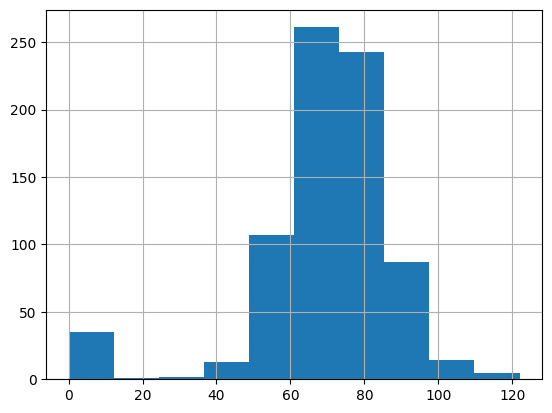

In [24]:
data["BloodPressure"].hist()

In [25]:
# sudý počet pozorování - medián může být průměr dvou středních hodnot, nemusí se vyskytovat v datasetu

In [55]:
clean_data =data[data['BloodPressure'] > 20]
clean_data['BloodPressure']

0      72
1      66
2      64
3      66
5      74
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 728, dtype: int64

<Axes: >

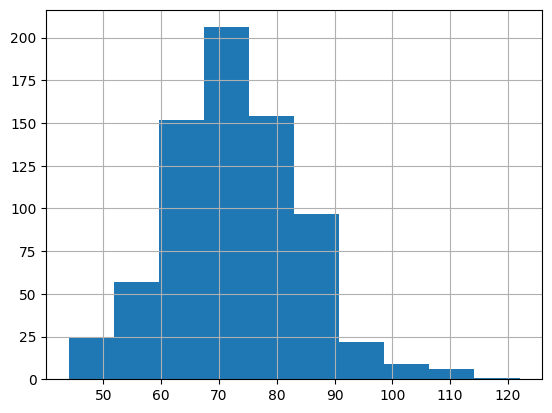

In [56]:
clean_data['BloodPressure'].hist()

In [57]:
print(clean_data['BloodPressure'])

0      72
1      66
2      64
3      66
5      74
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 728, dtype: int64


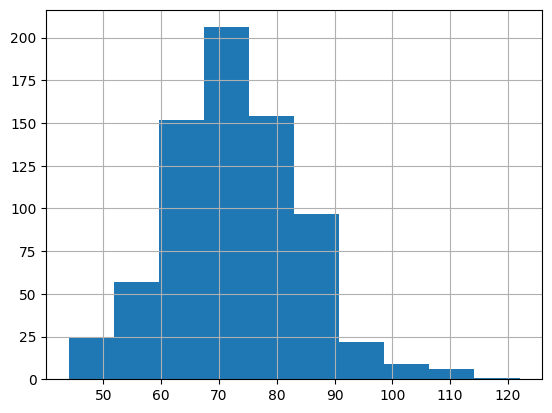

In [58]:
clean_data["BloodPressure"].hist()
data = clean_data

In [59]:
print(clean_data["BloodPressure"].mean())
print(clean_data["BloodPressure"].median())

72.67994505494505
72.0


In [60]:
print(data["BloodPressure"].mean())
print(data["BloodPressure"].median())

72.67994505494505
72.0


## Statistické hypotézy

Hypotézou obecně myslíme nějaké tvrzení. Testování hypotéz (*hypothesis testing*) se zabývá ověřením, zda je nějaká hypotéza platná. Při testování hypotéz předpokládáme, že máme k dispozici nějaký vzorek dat, nikoli kompletní data. To vnáší prvek určité nejistoty.

Uvažujme, že naším záměrem je zjistit, jestli se liší tlak krve u žen s cukrovkou a u žen bez ní.

Podívejme se nejprve, kolik dat máme v každé skupině.

In [45]:
#Populace je soubor všeho. (všechni občané ČR)
# Výběr - vzorek populace
# Náhodný vzorek - chceme aby jsme co nevíce prezentovali populaci. 

In [61]:
data['BloodPressure']

0      72
1      66
2      64
3      66
5      74
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 728, dtype: int64

In [62]:
data["Outcome"].value_counts()

Outcome
0    478
1    250
Name: count, dtype: int64

Podívejme se nyní na průměrné tlaky krve v obou skupinách. Nejprve si rozdělíme data do samostatných tabulek (bylo by možné využít i agregaci, ale data stejně musíme rozdělit, tak to udělejme nyní).

In [65]:
data_yes = data[data["Outcome"] == "yes"]
data_no = data[data["Outcome"] == "no"]

Podívejme se nejprve na tlak žen, které cukrovkou trpí.

In [64]:
data_yes["BloodPressure"].mean()

nan

In [41]:
data_yes["BloodPressure"].median()

nan

In [23]:
data_no["BloodPressure"].median()

70.0

In [24]:
data_no["BloodPressure"].mean()

70.87733887733887

Nyní se podívejme na tlak žen, které cukrovku nemají.

Data si můžeme porovnat i graficky. Šedá linka, kterou zobrazuje `barplot()`, je tzv. interval spolehlivosti, tj. interval, kde se dle odhadu nachází 95 % hodnot.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

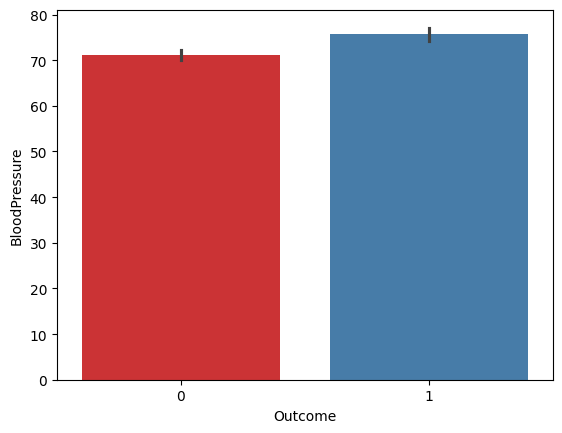

In [53]:
sns.barplot(data, x="Outcome", y="BloodPressure", hue ="Outcome", legend =False, palette="Set1")

In [54]:
data_no['BloodPressure'].std()

nan

In [26]:
data_no['BloodPressure'].std()

12.161222782694987

<Axes: >

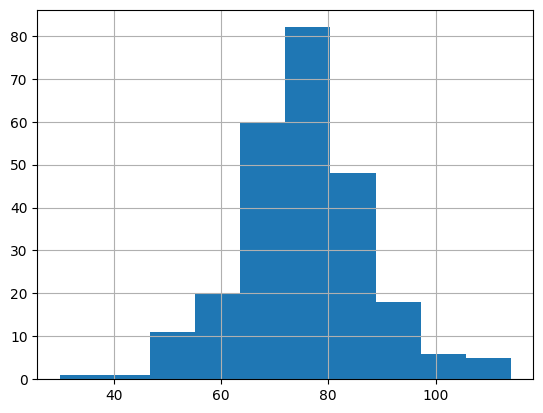

In [25]:
data_yes["BloodPressure"].hist()                                          

In [ ]:
data_no["BloodPressure"].hist()

In [ ]:
data['BloodPressure'].var()

In [ ]:
data['BloodPressure'].std()

In [ ]:
#Zeny, co nemaji cukrovku a maji vetsi krevni tlak nez prumer
data_no[data_no['BloodPressure'] >  data_yes['BloodPressure'].mean()]

Vidíme, že průměrná hodnota se liší. Musíme ale myslet na to, že máme jen omezený vzorek (768 žen), takže musíme být opatrní, pokud bychom chtěli formulovat nějaký obecný závěr na všechny ženy v populaci. Můžeme se výsledky podívat ze dvou směrů:

- "Čísla vyšla různě, tím pádem musí být průměr jiný."
- "Ten rozdíl je malý a máme jen vzorek 768, takže to nejspíše bude náhoda."

Ke které z těchto stran bychom se měli přiklonit? V řadě případů není možné se intuitivně přiklonit na jednu stranu. Právě tento problém za nás řeší testování hypotéz.

Testování hypotéz má pevný postup, který se skládá z následujících kroků:

* Formulace statistických hypotéz.
* Výběr vhodného testu.
* Výpočet hodnoty testového kritéria.
* Rozhodnutí o platnosti nulové hypotézy.

### Formulace statistických hypotéz

Při testování hypotéz vždy nejprve definujeme dvě hypotézy - **nulovou** (*null hypothesis*) a **alternativní** (*alternative hypohesis*). Tyto dvě hypotézy musí být vždy **ve sporu**, tj. nemůže nastat situace, že by byly obě pravdivé. Nulová hypotéza v sobě má často znaménko *rovná se*, alternativní pak mívá znaménko *nerovná se*, *větší než* nebo *menší než*. Dále můžeme v nulové hypotéze tvrdit, že mezi dvěma sloupci v tabulce není závislost, a alternativní hypotéza bude říkat, že závislost existuje (to si ukážeme v dalších lekcích).

Uvažujme následující dvojici hypotéz:

- Nulová hypotéza: Ženy trpící cukrovkou mají v průměru (*ve střední hodnota*) stejný krevní tlak jako ženy, které cukrovkou netrpí(to co platí)
- Alternativní hypotéza: Ženy trpící cukrovkou mají v průměru (*ve střední hodnota*) jiný krevní tlak jako ženy, které cukrovkou netrpí(nové zjištění)

Při formulování statistických hypotéz (a ve statistice obecně) obvykle rozlišujeme mezi dvěma pojmy:

- Průměr = to, co jsme **spočítali z našich dat**.
- Střední hodnota = hodnota, která se vztahuje k celé populaci (například ke všem ženám na světě). **Střední hodnotu neznáme, ale odhadujeme ji pomocí průměru.**

Je zřejmé, že obě hypotézy nemohou být pravidivé. Při testování hypotéz můžeme dojít k následujícím závěrům:

* zamítáme (*reject*) H0 (a tedy tvrdíme, že platí H1),
* nezamítáme (*do not reject*) H0 (a tedy jsme neprokázali, že platí H1).

Poněkud nepříjemnou zprávou pro vás může být informace, že výsledek našeho testu může být chybný, a to i v případě, že jsme postuovali správně. Může se totiž stát, že prostě máme smůlu na náš vzorek, který nereprezentuje data o celé populaci úplně správně.

Při testování se můžeme dopustit 2 chyb, které jsou popsány v tabulce níže.

|   | Krevní tlak se neliší | Krevní tlak se liší |
|---|---|---|
| **Neprokázali jsme rozdíl** | Správný výsledek | Chyba II. druhu (*Type II Error*) |
| **Tvrdíme, že jsme našli rozdíl**  | Chyba I. druhu (*Type I Error*) | Správný výsledek |

Rozepišme si nyní tyto chyby obecně

|   | Nulová hypotéze platí | Nulová hypotéza neplatí |
|---|---|---|
| **Nezamítáme nulovou hypotézu** | Správný výsledek | Chyba II. druhu |
| **Zamítáme nulovou hypotézu**  | Chyba I. druhu | Správný výsledek |

Při testování hypotéz si zpravidla vybíráme pravděpodobnost, s jakou se chceme dopustit chyby I. druhu. Pravděpodobnost chyby I. druhu označujeme jako **hladinu významnosti** (*significance level*).

## Výběr vhodného testu

Dále zvolíme vhodný test pro ověření naší hypotézy. Statistických testů existuje obrovské množství a výběr toho správného závisí obecně na několika faktech:

- **Počet souborů (skupin) dat**, se kterými chceme v testu pracovat. V tomto konkrétním případě chceme pracovat se dvěma soubory (*sample*), můžeme mít ale pouze jeden či naopak 3 a více. Soubory myslíme "skupiny", které v testu porovnáváme. V našem testu máme dvě skupiny - ženy trpící cukrovkou a ženy, které cukrovku nemají. Nejde o to, kolik dat máme pro každou ze skupin. Mohli bychom mít například milion záznamů o ženách s cukrovkou a milion záznamů o ženách bez ní, ale pořád by šlo o dva soubory.
- **Statistický ukazatel** nebo skutečnost, kterou chceme ověřit. V našem případě půjde o průměr, ale je možné testovat i jiné skutečnosti.
- **Předpoklady testu.** Předpoklad je nějaká podmínka, která musí být splněna, aby test dával kvalitní výsledky. O tom si více povíme příště.

Vraťme se k našemu testu. Chceme porovnat průměry ve dvou souborech. Pro tento případ existuje několik testů, my zvolíme test označovaný jako **t-test**.

Samotný výpočet můžeme provést s využitím modulu `scipy`, konkrétně funkce `stats.ttest_ind`.

In [ ]:
stats.ttest_ind(data_yes["BloodPressure"], data_no["BloodPressure"])

In [ ]:
#-06 je 10 na -6 před desetinnou čárku přidat 6 míst


In [ ]:
#Statistická významnost stanoví se před testem - sociologie 10%, naopak NASA méně než 1%

Co tato záhadná čísla znamenají?

- `statistics` je hodnota statistiky testu. Statistika testu je v podstatě vzoreček. V tomto případě číslo říká, jak moc pořadí pozorování v jednom souboru odpovídá pořadí pozorování ve druhém souboru.
- `pvalue` (p-hodnota) se váže k hladině významnosti. p-hodnotu využijeme pro rozhodnutí o platnosti alternativní hypotézy.

Platí následující **obecná** pravidla.

- Pokud je **p-hodnota menší než hladina významnosti, zamítáme nulovou hypotézu** (tj. platí alternativní hypotéza).
- Pokud je **p-hodnota větší než hladina významnosti, nezamítáme nulovou hypotézu.**

Pokud si zvolíme hladinu významnosti jako 5 %, což je nejčastější volba, můžeme zapsat pravidlo konkrétněji.

- Pokud je **p-hodnota < 0.05, zamítáme nulovou hypotézu** (tj. platí alternativní hypotéza).
- Pokud je **p-hodnota > 0.05, nezamítáme nulovou hypotézu.**

V našem případě je p-hodnota `0.07151390009776082`. Číslo je vyšší než 0.05. I když jsme tedy zjistili různou hodnotu průměrného tlaku u našich dvou skupin, rozdíl není "statisticky významný". To znamená, že pravděpodobnost, že by takový rozdíl (na výběru dané velikosti) mohl být náhoda, je příliš velká.

Cukrovka může souviset i s hmotností. Zkusme nyní zopakovat postup pro porovnání průměrné hmotnosti pacientek trpících cukrovkou a pacientech, které cukrovkou netrpí. Začneme formulací hypotéz.

- Nulová hypotéza: Ženy trpící cukrovkou mají v průměru stejný index BMI jako ženy, které cukrovkou netrpí
- Alternativní hypotéza: Ženy trpící cukrovkou mají v průměru jiný index BMI než ženy, které cukrovkou netrpí

Protože opět porovnáváme průměr dvou různých souborů, použijeme t-test. Opět využijeme funkci `ttest_ind()` z modulu `scipy`.

In [ ]:
stats.ttest_ind(data_yes["BMI"], data_no["BMI"])

Nyní vychází p-hodnota `1.2298074873116022e-16`. Důležité je především nenápadné číslo `e-16`. Co znamená? Číslo je zobrazené v takzvaném vědeckém formátu, což znamená, že vidíme první nenulové číslo za desetinnou čárkou a `e-16` nám říká, na kolikáté pozici za desetinnou čárkou tato číslice je. Uložme si nejprve výsledky do proměnných. Protože máme dva výsledky, připravíme si dvě proměnné - proměnnou `statistics` pro statistiku testu a `pvalue` pro p-hodnotu.

In [ ]:
statistics, pvalue = stats.ttest_ind(data_yes["BMI"], data_no["BMI"])

Nyní můžeme použít funkci `format_float_positional` z modulu `numpy`, abychom zobrazil výsledek jako desetinné číslo. Vidíme, že za desetinnou čárkou je obrovské množství nul a až poté se objevuje číslo 1. Určitě je tedy p-hodnota menší než 0.05.

In [ ]:
np.format_float_positional(pvalue)

Můžeme tedy formulovat závěr, že průměrný hodnota indexu BMI se liší pro ženy trpící cukrovkou a pro ženy, které cukrovkou netrpí.

Pozor ovšem na to, abychom závěry nezkresili. Pouze na základě našeho výzkumu nemůžeme tvrdít, že vyšší hmotnost vede k cukrovce. Je totiž teoreticky možné, že cukrovka způsobuje pomalejší odbourávání tuků.

Formulace hypotéz a výběr testu je na celém testování hypotéz nejtěžší. Pomocí nám může například nástroj ChatGPT. Zkusme mu zadat dotaz: *"Mám data o pacientkách, z nichž část trpí cukrovkou a část ne. V datech je i informace o krevním tlaku každé z pacientek. Chci statisticky ověřit, jestli se krevní tlak pacientek s cukrovkou liší od těch, které cukrovku nemají. Formuluj statistické hypotézy."*

Níže vidíme odpověď.

![chatgpt.png](chatgpt.png)

Všimněte si symbolu $\mu$. Jde o řecké písmeno "mí", které se ve statistice používá pro střední hodnotu.

Přesné hodnoty kvantilů můžeme též získat s využitím funkce `quantile` z modulu `numpy`.

### Čtení na doma Inverzní kvantilová funkce

Zajímavá může být i **opačná otázka** - kolik procent hodnot je menších než nějaká vybraná hodnota? Protože řešíme opačný problém než u kvantilové funkce, někdy se pro tuto funkci používá pojem inverzní kvantilová funkce, častější označení je pak **empirická distribuční funkce** (*empirical distribution function*).

Uvažujme například, že by některou pacientku zajímalo, kolik procent pacientek má méně glukózy než ona. Uvažujme například, hodnota pacientky je 125. Odpověď na to může poskytnout právě empirická distribuční funkce. V modulu `scipy` je tato funkce pojmenovaná jako `percentileofscore` a jako parametr jí dáme sérii `Glucose` a hodnotu glukózy naší pacientky (125).

Pojem *empirická* se vztahuje k tomu, že funkci sestavujeme na základě konkrétních dat. Kromě toho je možné získat distribuční funkci jako matematický vzorec. Funkce má stejnou interpretaci, tj. říká nám, kolik procent dat z nějakého datového souboru je menší než nějaká konkrétní hodnota.

In [ ]:
stats.percentileofscore(data["Glucose"], 125)

Výsledkem je hodnota 60,48, tj. asi 60 % pacientek z našeho vzorku má nižší hodnotu glokózy.

Funkci si můžeme zobrazit i graficky. Na ose *x* grafu vidíme hodnotu glukózy a na o *y* procento hodnot, které jsou menší. Funkce je rostoucí, protože jak se posunujeme k vyšším hodnotám glukózy, roste nám procento hodnot, které jsou menší.

In [ ]:
sns.ecdfplot(data=data, x="Glucose")

Pomocí parametru `hue` si můžeme zobrazit dvě empirické distribuční funkce v závislosti na tom, jestli některá z pacientek trpí cukrovkou. Čím jsou si data podobnější, tím jsou empirické distribuční funkce více u sebe.

In [ ]:
sns.ecdfplot(data=data, x="Glucose", hue="Outcome", palette="Set1")

Níže například vidíme empirické distribuční funkce pro krevní tlak. Ty jsou si mnohem blíže než ty pro hladinu glukózy.

In [ ]:
sns.ecdfplot(data=data, x="BloodPressure", hue="Outcome",palette="bright")

### Čtení na doma: Jak je spočítaná p-hodnota našeho testu

Vraťme se k našemu příkladu a podívejme se podrobně na to, jak je spočítaná p-hodnota testu. Nejprve se ale musíme vrátit ke statistice testu. Statistika je spočítaná dle vzorce:

$\frac{\bar{X_1} - \bar{X_2}}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

kde $\bar{X_1}$ a $\bar{X_2}$ jsou průměry obou souborů, $n_1$ a $n_2$ jsou rozsahy výběrů (tj. počet hodnot v obou skupinách) a $s_p$ je tzv. směrodatná odchylka. Směrodatná odchylka je jedním z ukazatelů variability (různorodosti) dat. Čím více jsou data různorodá, tím více různé průměry můžeme spočítat, i když jsou střední hodnoty stejné.

Zkusme tedy do našeho vzorečku dosadit. Jako soubor 1 uvažujeme ženy, které cukrovkou trpí, a jako soubor 2 ty, které cukrovkou netrpí.

In [8]:
import pandas as pd
data = pd.read_csv("diabetes.csv")

mean_x1 = data_yes["BloodPressure"].mean()
mean_x2 = data_no["BloodPressure"].mean()
std = data["BloodPressure"].std()
n1 = data_yes["BloodPressure"].shape[0]
n2 = data_no["BloodPressure"].shape[0]

t = (mean_x1 - mean_x2) / (std * np.sqrt(1/n1 + 1/n2))
t

NameError: name 'data_yes' is not defined

Získali jsme stejnou hodnotu, jakou nám spočítal modul `scipy`.

Zkusme se nad vzorečkem nejprve zamyslet. Uvažujme nejprve, že bychom z nějakých dat zjistili, že ženy, které cukrovku nemají, mají větší krevní tlak než ty, které cukrovkou trpí. V takovém případě je $x_1$ větší než $x_2$ a celá hodnota statistiky vyjde jako záporné číslo. Dále platí, že větší je rozdíl mezi oběma průměry, tím dále od 0 výsledné číslo je. Pokud by byly průměry naopak blízko, vyjde statistika blízko 0. A naopak, pokud by nám vyšlo, že ženy s cukrovkou mají vyšší krevní tlak než ty bez cukrovky, vyjde statistika kladná (což je ostatní i náš případ). A čím vyšší bude průměr u žen s cukrovkou oproti těm bez ní, tím větší číslo statistika bude.

Obecně tedy platí, že čím větší je rozdíl mezi zjištěnými průměry, tím dále od 0 statistika vyjde. Současně platí, že pokud jsou střední hodnoty obou souborů stejné (tj. v případě, že platí H0), je více pravděpodobné, že i průměry náhodných výběrů budou podobné, a tím pádem je pravděpodobnější hodnota statistiky blízko 0. Naopak hodnoty dále od 0 jsou méně pravděpodobné.

Uvažujme tedy nějakou hodnotu statistiky *t*. Pokud je hodnota záporná, pak všechny hodnoty menší než *t* jsou méně pravděpodobné (za předpokladu, že platí H0). p-hodnota v sobě zahrnuje zjištěný rozdíl průměrů a všechny, které jsou méně pravděpodobné, tj. dále od 0.

Platí tedy následující dvě pravidla:

- Pokud je rozdíl průměrů záporný, jsou méně pravděpodobné hodnoty nalevo.
- Pokud je rozdíl průměrů kladný, jsou méně pravděpodobné hodnoty napravo.

K určení hodnoty pravděpodobnosti použijeme distribuční funkci. Pro naši statistiku můžeme použít tzv. normální rozdělení, které najdeme v modulu `stats` pod označením `norm`. Distribuční funkce se skrývá pod označením `cdf` (cumulative distribution number).

In [ ]:
stats.norm.cdf(t)

Pro naši statistiku je hodnota téměř 1. Musíme ale myslet na předchozí odrážku, která říká, že se díváme směrem doprava. Dopočítáme tedy "zbytek" od jedničky.

In [ ]:
1 - stats.norm.cdf(t)

Nakonec p-hodnotu násobíme dvěma. Uvažujeme totiž stejně nepravděpodobné hodnoty i pro "opačný případ". Teoreticky tedy zahrneme jak pravděpodobnost statistiky 1.802 a všech vyšších, tak i pravděpodobnost statistiky - 1.802 a všech nižších.

In [7]:
(1 - stats.norm.cdf(t)) * 2

NameError: name 't' is not defined

## Cvičení

## Důvěra v EU a euro

Tentokrát budeme pracovat s daty z výzkumu veřejného mínění Eurobarometr. Ten je realizován v zemích Evropské unie a lidé jsou v něm pravidelně tázání na řadu otázek. My se podíváme na jednu z nich. Rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? Využij znovu data o důvěře v EU ze souboru [duvera.csv](duvera.csv) a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni.

Použij sloupce `EU Trust` (důvěra v EU) a `Euro` (jestli má země euro).

Aplikuj postup, který jsme si ukázali v lekci, tj. formuluj hypotézy, určitě p-hodnotu a rozhodni o výsledku testu.

Zdroj dat: [https://europa.eu/eurobarometer/screen/home](https://europa.eu/eurobarometer/screen/home)

H0 - důvěra se neliší
H1 - důvěra se liší podle toho jestlije stát v Eurozóně

In [1]:
data = pd.read_csv("duvera.csv")
data.head()

NameError: name 'pd' is not defined

In [ ]:
data_euro = data[data["Euro"] == 1]
data_not_euro = data[data["Euro"] == 0]
stats.ttest_ind(data_euro['EU Trust'], data_not_euro['EU Trust'])


## Bonus: Inflace

V souboru [inflace.csv](inflace.csv) najdeš procenta lidí, kteří považují inflaci a růst životních nákladů za jeden ze svých nejzávažnějších problémů. Data jsou za dvě období - léto 2022 (sloupec `97`) a zima 2022/2023 (sloupec `98`). Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

Jedná se o tzv. párová data. Máme totiž dva údaje pro každý stát. Jinak řečeno, ke každé hodnotě ze sloupečku `97` patří jedna konkrétní hodnota ze sloupečku `98` (vždy jde o hodnoty pro ten samý stát). Pro taková data je vhodnější použití [párového testu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). Pro párový test formulujeme stejné hypotézy jako u nepárového. Rozdíl je v tom, že pro párové pozorování vypočtená p-hodnota přesnější.

Aplikuj postup, který jsme si ukázali v lekci, tj. formuluj hypotézy, určitě p-hodnotu a rozhodni o výsledku testu.

In [ ]:
data = pd.read_csv("inflace.csv")
data.head()


In [ ]:
stats.ttest_rel(data['97'], data['98'])

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

data = pd.read_csv("diabetes.csv")
data.head()
